In [ ]:
!mkdir -p ~/.kaggle
!cp kaggle.json ~/.kaggle/

In [ ]:
!kaggle datasets download -d gpiosenka/sports-classification

Dataset URL: https://www.kaggle.com/datasets/gpiosenka/sports-classification
License(s): CC0-1.0
 96% 405M/424M [00:03<00:00, 165MB/s]
100% 424M/424M [00:03<00:00, 141MB/s]


In [ ]:
import zipfile
zip_ref=zipfile.ZipFile('/content/sports-classification.zip', 'r')
zip_ref.extractall('/content')
zip_ref.close

<bound method ZipFile.close of <zipfile.ZipFile filename='/content/sports-classification.zip' mode='r'>>

In [ ]:
import tensorflow as tf
from tensorflow import keras
from keras.models import Sequential
from keras.layers import Dense, Conv2D, MaxPooling2D, Flatten, Dropout, BatchNormalization

In [ ]:
# generators will divied your images in batchs
train_ds=keras.utils.image_dataset_from_directory(
    directory='/content/train',
    labels='inferred',
    label_mode='int',
    batch_size=64,
    image_size=(256,256)
)

Validation_ds=keras.utils.image_dataset_from_directory(
    directory='/content/valid',
    labels='inferred',
    label_mode='int',
    batch_size=64,
    image_size=(256,256)
)

test_ds = keras.utils.image_dataset_from_directory(
    directory="/content/test",
    labels="inferred",
    label_mode="int",
    batch_size=64,
    image_size=(256, 256),
 )

Found 13492 files belonging to 100 classes.
Found 500 files belonging to 100 classes.
Found 500 files belonging to 100 classes.


In [ ]:
#Normalizing the numpy array in to 0 & 1

def process(image,label):
  image=tf.cast(image/255. ,tf.float32)
  return image,label

train_ds=train_ds.map(process)
Validation_ds=Validation_ds.map(process)

In [ ]:
#creating CNN model

model=Sequential()
# model.add(Conv2D(128, (3,3), padding='valid', activation='relu', input_shape=(256,256,3)))
# model.add(MaxPooling2D(pool_size=(2,2), strides=2, padding='valid'))

# model.add(Conv2D(64, (3,3), padding='valid', activation='relu'))
# model.add(MaxPooling2D(pool_size=(2,2), strides=2, padding='valid'))

# model.add(Conv2D(128, (3,3), padding='valid', activation='relu'))
# model.add(MaxPooling2D(pool_size=(2,2), strides=2, padding='valid'))

# model.add(Flatten())

# model.add(Dense(128, activation='relu'))
# model.add(Dense(64, activation='relu'))
# model.add(Dense(1, activation='sigmoid'))
model.add(
    Conv2D(
        128,
        kernel_size=(3, 3),
        padding="valid",
        activation="relu",
        input_shape=(256, 256, 3),
    )

)

model.add(BatchNormalization())

model.add(MaxPooling2D(pool_size=(2, 2), strides=2, padding="valid"))
model.add(Conv2D(64, kernel_size=(3, 3), padding="valid", activation="relu"))
model.add(BatchNormalization())

model.add(MaxPooling2D(pool_size=(2, 2), strides=2, padding="valid"))
model.add(Conv2D(32, kernel_size=(3, 3), padding="valid", activation="relu"))
model.add(BatchNormalization())

model.add(MaxPooling2D(pool_size=(2, 2), strides=2, padding="valid"))
model.add(Flatten())

model.add(Dense(512, activation="relu"))
model.add(Dropout(0.1))

model.add(Dense(256, activation="relu"))
model.add(Dropout(0.1))

model.add(Dense(128, activation="relu"))
model.add(Dropout(0.1))

model.add(Dense(100, activation='softmax'))

In [ ]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 254, 254, 128)     3584      
                                                                 
 batch_normalization (Batch  (None, 254, 254, 128)     512       
 Normalization)                                                  
                                                                 
 max_pooling2d (MaxPooling2  (None, 127, 127, 128)     0         
 D)                                                              
                                                                 
 conv2d_1 (Conv2D)           (None, 125, 125, 64)      73792     
                                                                 
 batch_normalization_1 (Bat  (None, 125, 125, 64)      256       
 chNormalization)                                                
                                                        

In [ ]:
#compile the model

model.compile(optimizer='adam', loss="sparse_categorical_crossentropy", metrics=['accuracy'])
callback = tf.keras.callbacks.EarlyStopping(monitor="val_loss", patience=2)

In [ ]:
#running the model
callback = tf.keras.callbacks.EarlyStopping(monitor="val_loss", patience=2)
history=model.fit(train_ds, epochs=50,batch_size=32,callbacks=[callback],validation_data=Validation_ds,)

Epoch 1/50
211/211 [==============================] - 106s 436ms/step - loss: 4.5567 - accuracy: 0.0342 - val_loss: 4.5964 - val_accuracy: 0.0120
Epoch 2/50
211/211 [==============================] - 89s 419ms/step - loss: 3.8988 - accuracy: 0.0982 - val_loss: 4.1203 - val_accuracy: 0.0580
Epoch 3/50
211/211 [==============================] - 88s 414ms/step - loss: 3.4226 - accuracy: 0.1588 - val_loss: 3.4920 - val_accuracy: 0.1560
Epoch 4/50
211/211 [==============================] - 89s 419ms/step - loss: 3.0095 - accuracy: 0.2319 - val_loss: 3.2123 - val_accuracy: 0.2580
Epoch 5/50
211/211 [==============================] - 88s 414ms/step - loss: 2.5818 - accuracy: 0.3220 - val_loss: 2.9729 - val_accuracy: 0.2740
Epoch 6/50
211/211 [==============================] - 88s 412ms/step - loss: 2.1649 - accuracy: 0.4080 - val_loss: 3.4813 - val_accuracy: 0.2400
Epoch 7/50
211/211 [==============================] - 90s 420ms/step - loss: 1.7201 - accuracy: 0.5159 - val_loss: 3.4029 - val_a

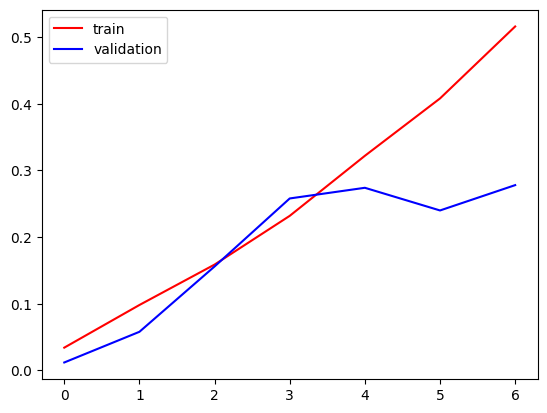

In [ ]:
import matplotlib.pyplot as plt
plt.plot(history.history['accuracy'],color='red',label='train')
plt.plot(history.history['val_accuracy'],color='blue',label='validation')
plt.legend()
plt.show()

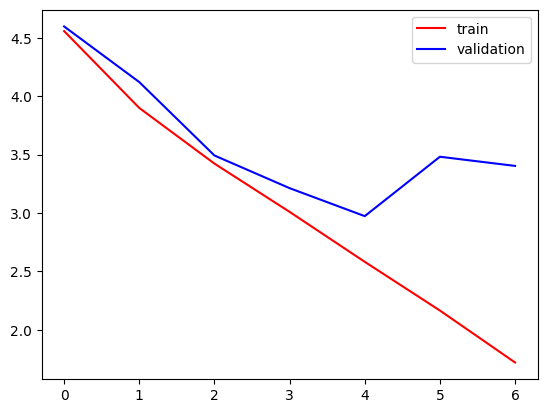

In [ ]:
plt.plot(history.history['loss'],color='red',label='train')
plt.plot(history.history['val_loss'],color='blue',label='validation')
plt.legend()
plt.show()

sports_labels: ['3.jpg', '1.jpg', '5.jpg', '2.jpg', '4.jpg']
Image identified as 4.jpg


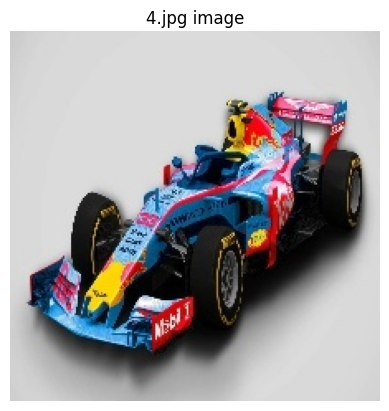

In [ ]:
import cv2
import matplotlib.pyplot as plt
import numpy as np
import os

def compare_histograms(img1, img2):
    """Compare histograms of two images and return a similarity score."""
    hist1 = cv2.calcHist([img1], [0, 1, 2], None, [8, 8, 8], [0, 256, 0, 256, 0, 256])
    hist2 = cv2.calcHist([img2], [0, 1, 2], None, [8, 8, 8], [0, 256, 0, 256, 0, 256])
    hist1 = cv2.normalize(hist1, hist1).flatten()
    hist2 = cv2.normalize(hist2, hist2).flatten()
    return cv2.compareHist(hist1, hist2, cv2.HISTCMP_CORREL)

# Load reference images and their labels
sports_images = []
sports_labels = []



# Assuming sports images are stored in a folder named 'sports_dataset'
sports_folder = '/content/test/formula 1 racing'

# Loop through each file in the sports folder
for filename in os.listdir(sports_folder):
    if filename.endswith('.jpg') or filename.endswith('.png'):
        # Load image
        img_path = os.path.join(sports_folder, filename)
        img = cv2.imread(img_path)
        if img is not None:
            sports_images.append(img)
            # Extract sport name from filename (assuming the format 'sportname_number.jpg')
            sport_name = filename.split('_')[0]
            sports_labels.append(sport_name)
# print("sports_images:", sports_images)
print("sports_labels:", sports_labels)
# Read the test image using OpenCV
test_img_path = '/content/test/formula 1 racing/4.jpg'
test_img = cv2.imread(test_img_path)

# Check if the image was loaded successfully
if test_img is None:
    print("Error: Unable to load image")
else:

    test_img_rgb = cv2.cvtColor(test_img, cv2.COLOR_BGR2RGB)

    # Compare the test image with all reference images
    similarity_scores = []
    for ref_img in sports_images:
        similarity = compare_histograms(test_img, ref_img)
        similarity_scores.append(similarity)

    # Find the index of the highest similarity score
    max_similarity_index = np.argmax(similarity_scores)
    max_similarity_score = similarity_scores[max_similarity_index]

    # Set a threshold for similarity
    threshold = 0.5

    if max_similarity_score > threshold:
        identified_sport = sports_labels[max_similarity_index]
        print(f"Image identified as {identified_sport}")
        plt.imshow(test_img_rgb)
        plt.title(f"{identified_sport} image")
        plt.axis('off')  # Hide the axis
        plt.show()
    else:
        print("Image can't be identified as a known sport")